In [1]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
install.packages(c("mnormt", "psych", "SnowballC", "hunspell", 
                   "broom", "tokenizers", "janeaustenr"))

package 'mnormt' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked
package 'SnowballC' successfully unpacked and MD5 sums checked
package 'hunspell' successfully unpacked and MD5 sums checked
package 'broom' successfully unpacked and MD5 sums checked
package 'tokenizers' successfully unpacked and MD5 sums checked
package 'janeaustenr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shail\AppData\Local\Temp\RtmpsDgY0J\downloaded_packages


In [3]:
install.packages("tidytext")

package 'tidytext' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shail\AppData\Local\Temp\RtmpsDgY0J\downloaded_packages


In [4]:
install.packages("ggplot2")
install.packages("wordcloud")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shail\AppData\Local\Temp\RtmpsDgY0J\downloaded_packages
package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shail\AppData\Local\Temp\RtmpsDgY0J\downloaded_packages


In [5]:
library(tidytext)
sentiments

word,sentiment
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative
aborts,negative


**We will make use of three general purpose lexicons like –**

    1.AFINN
    2.bing
    3.loughran

**These three lexicons make use of the unigrams. Unigrams are a type of n-gram model that consists of a sequence of 1 item, that is, a word collected from a given textual data.**
**In the AFINN lexicon model scores the words in a range from -5 to 5. **
**The increase in negativity corresponds the negative sentiment whereas an increase in positivity corresponds the positive one.**
**The bing lexicon model on the other hand, classifies the sentiment into a binary category of negative or positive. 
**And finally, the loughran model that performs analysis of the shareholder’s reports. In this project, we will make use of the bing lexicons to extract the sentiments out of our data. We can retrieve these lexicons using the get_sentiments() function.**

In [6]:
get_sentiments("bing")

word,sentiment
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative
aborts,negative


**In this step, we will import our libraries ‘janeaustenr’, ‘stringr’ as well as ‘tidytext’.**

**The janeaustenr package will provide us with the textual data in the form of books authored by the novelist Jane Austen.**

**Tidytext will allow us to perform efficient text analysis on our data. We will convert the text of our books into a tidy format using unnest_tokens() function.**

In [7]:
library(janeaustenr)
library(stringr)
library(tidytext)

tidy_data <- austen_books() %>%
    group_by(book) %>%
    mutate(linenumber = row_number(),
    chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", 
                              ignore_case = TRUE)))) %>%
ungroup() %>%
unnest_tokens(word, text)

**We have performed the tidy operation on our text such that each row contains a single word.**

**We will now make use of the “bing” lexicon to and implement filter() over the words that correspond to joy.**

**We will use the book Sense and Sensibility and derive its words to implement out sentiment analysis model.**

In [8]:
positive_senti <- get_sentiments("bing") %>%
    filter(sentiment == "positive")
tidy_data %>%
    filter(book == "Emma") %>%
    semi_join(positive_senti) %>%
    count(word, sort = TRUE)

Joining, by = "word"


word,n
well,401
good,359
great,264
like,200
better,173
enough,129
happy,125
love,117
pleasure,115
right,92


**From our above result, we observe many positive words like “good”, “happy”, “love” etc.**

**In the next step, we will use spread() function to segregate our data into separate columns of positive and negative sentiments.**

**We will then use the mutate() function to calculate the total sentiment, that is, the difference between positive and negative sentiment.**

In [9]:
library(tidyr)
bing <- get_sentiments("bing")
Emma_sentiment <- tidy_data %>%
    inner_join(bing) %>%
    count(book = "Emma" , index = linenumber %/% 80, sentiment) %>%
    spread(sentiment, n, fill = 0) %>%
    mutate(sentiment = positive - negative)

Joining, by = "word"


**In the next step, We will visualize the words present in the book “Emma” based on their corrosponding positive and negative scores.**

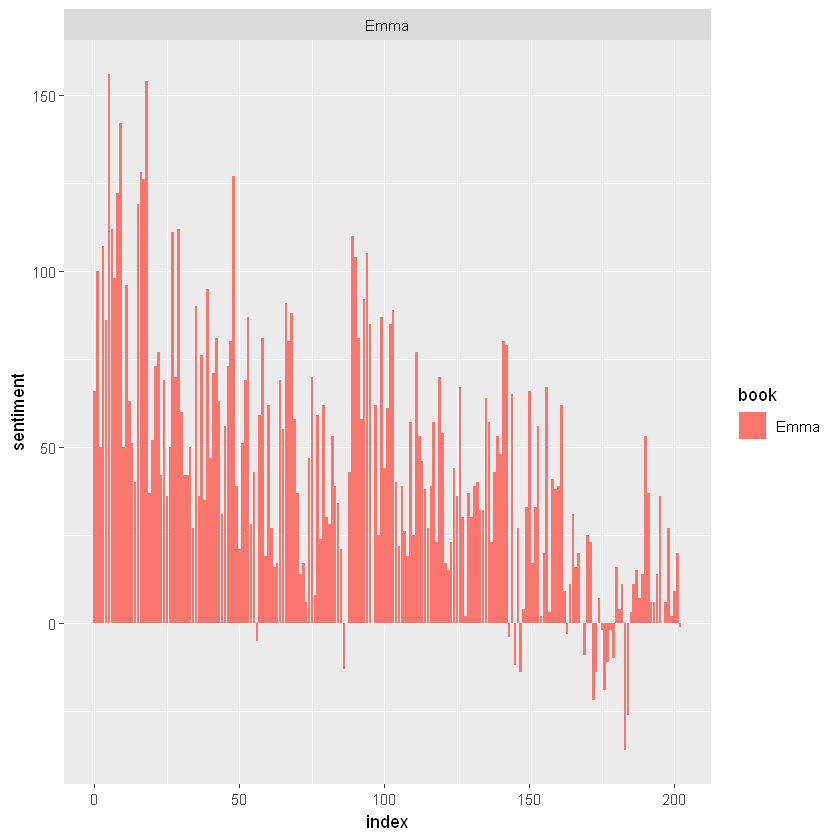

In [10]:
library(ggplot2)
ggplot(Emma_sentiment, aes(index, sentiment, fill = book)) +
    geom_bar(stat = "identity", show.legend = TRUE) +
    facet_wrap(~book, ncol = 2, scales = "free_x")

**Let's now proceed towards counting the most common positive and negative words that are present in the novel.**

In [11]:
counting_words <- tidy_data %>%
    inner_join(bing) %>%
    count(word, sentiment, sort = TRUE)

Joining, by = "word"


In [12]:
head(counting_words)

word,sentiment,n
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639


**In the next step, we will perform visualization of our sentiment score. We will plot the scores along the axis that is labeled with both positive as well as negative words. We will use ggplot() function to visualize our data based on their scores.**

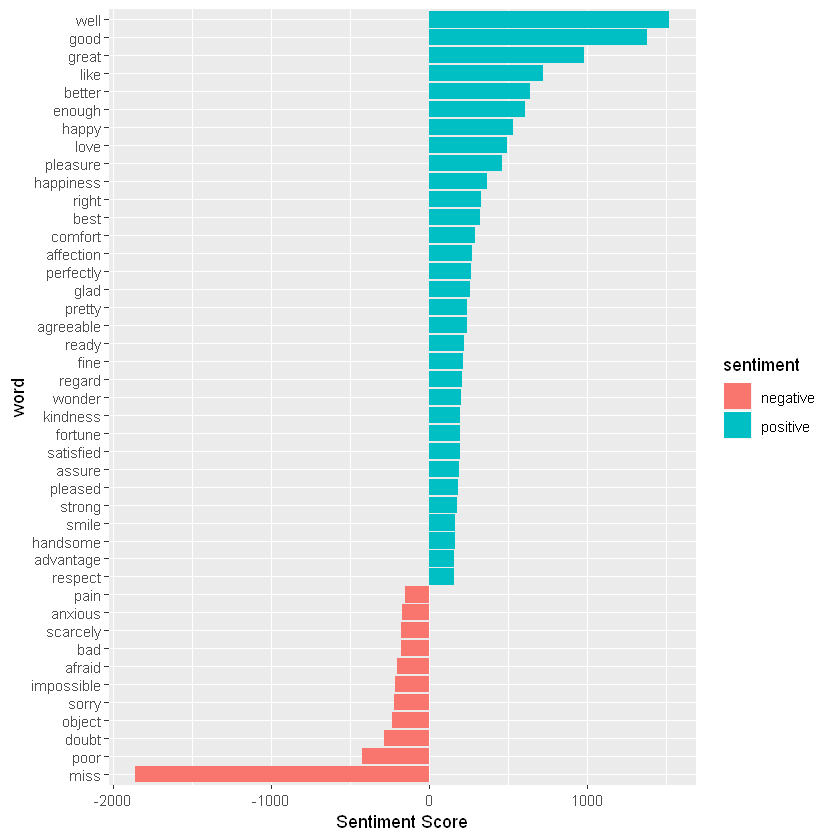

In [13]:
counting_words %>%
    filter(n > 150) %>%
    mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
    mutate(word = reorder(word, n)) %>%
    ggplot(aes(word, n, fill = sentiment))+
    geom_col() +
    coord_flip() +
    labs(y = "Sentiment Score")

**In the final visualization, Let's create a wordcloud that will delineate the most recurring positive and negative words. In particular, we will use the comparision.cloud() function to plot both negative and positive words in a single wordcloud**


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Loading required package: RColorBrewer
Joining, by = "word"


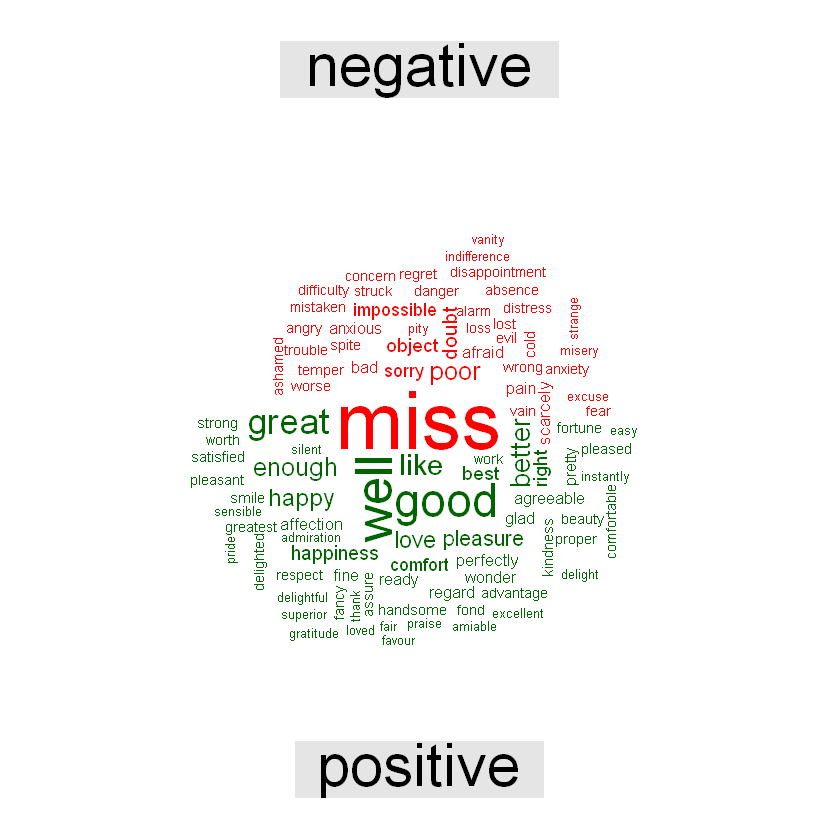

In [14]:
library(reshape2)
library(wordcloud)
tidy_data %>%
 inner_join(bing) %>%
 count(word, sentiment, sort = TRUE) %>%
 acast(word ~ sentiment, value.var = "n", fill = 0) %>%
 comparison.cloud(colors = c("red", "dark green"),
          max.words = 100)

This word cloud will enable us to efficiently visualize the negative as well as positive groups of data. Therefore, we are now able to see the different groups of data based on their corresponding sentiments. You can experiment with several other datasets like tweets in order to gain a comprehensive insight into sentiment analysis

# SUMMARY

**In this project, We went through our project of sentiment analysis in R. We learnt about the concept of sentiment analysis and implemented it over the dataset of Jane Austen’s books. 
We were able to delineate it through various visualizations after we performed data wrangling on our data. 
We used a lexical analyzer – ‘bing’ in this instance of our project. 
Furthermore, We also represented the sentiment score through a plot and also made a visual report of wordcloud.**